<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/CIFAR10_dataset_saving_entire_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

cifar = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar.load_data()

print('x train shape: {}'.format(x_train.shape))
print('y train shape: {}'.format(y_train.shape))
print('x test shape: {}'.format(x_test.shape))
print('y test shape: {}'.format(y_test.shape))

labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

x_train = x_train / 255.0
x_test = x_test / 255.0

2.4.1
170500096/170498071 [==============================] - 2s 0us/step
x train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
x test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


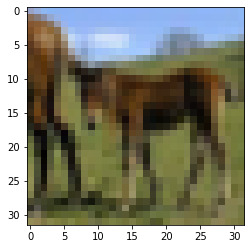

this is image of horse


In [2]:
import matplotlib.pyplot as plt
import numpy as np

inx = np.random.choice(x_train.shape[0])
img = x_train[inx]
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.show()
img_label = labels[y_train[inx][0]]
print('this is image of {}'.format(img_label))

['frog', 'horse', 'airplane', 'ship', 'automobile', 'frog', 'ship', 'cat', 'truck', 'deer']


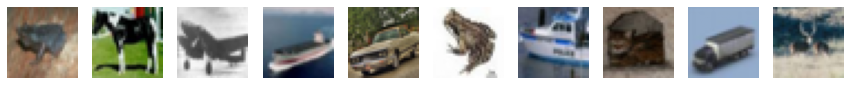

In [3]:
fig, ax = plt.subplots(1, 10, figsize=(15, 15))

img_labels=[]
for i in range(10):
  inx = np.random.choice(x_train.shape[0])
  img = x_train[inx]
  ax[i].imshow(img)
  ax[i].set_axis_off()
  img_labels.append(labels[y_train[inx][0]])
print(img_labels)


In [4]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

def get_model():
  model = Sequential([Conv2D(filters=16, kernel_size=(3,3),
                             input_shape=(32, 32, 3), activation='relu',
                             name='Conv2D_1'),
                      Conv2D(filters=8, kernel_size=(3,3), activation='relu',
                             name='Conv2D_2'),
                      MaxPooling2D(pool_size=(4,4), name='MaxPooling2D_1'),
                      Flatten(name='flatten'),
                      Dense(32, activation='relu', name='Dense_1'),
                      Dense(10, activation='softmax', name='Dense_2')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
  return model

In [5]:
model = get_model()
model.summary()
del model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
MaxPooling2D_1 (MaxPooling2D (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
Dense_2 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
____________________________________________________

In [6]:
def get_test_accuracy(model, x_test, y_test):
  test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=False)
  print('test accuracy: {acc:0.3f}'.format(acc=test_acc))

In [7]:
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

print('x train shape: {}'.format(x_train.shape))
print('y train shape: {}'.format(y_train.shape))
print('x test shape: {}'.format(x_test.shape))
print('y test shape: {}'.format(y_test.shape))

x train shape: (10000, 32, 32, 3)
y train shape: (10000, 1)
x test shape: (1000, 32, 32, 3)
y test shape: (1000, 1)


# Let's create a checkpoint that saves the entire model and not only the weights in either `TensorFlow .PB` format or the `Keras HDF5 so .h5` format.

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path ='model_checkpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_freq='epoch',
                             save_weights_only=False,
                             verbose=1)

In [9]:
model = get_model()

In [10]:
model.fit(x_train, y_train,
          epochs=3,
          callbacks=[checkpoint])

Epoch 1/3
313/313 [==============================] - 8s 3ms/step - loss: 2.1763 - accuracy: 0.1847

Epoch 00001: saving model to model_checkpoint
INFO:tensorflow:Assets written to: model_checkpoint/assets
Epoch 2/3
313/313 [==============================] - 1s 2ms/step - loss: 1.7793 - accuracy: 0.3511

Epoch 00002: saving model to model_checkpoint
INFO:tensorflow:Assets written to: model_checkpoint/assets
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 1.5712 - accuracy: 0.4263

Epoch 00003: saving model to model_checkpoint
INFO:tensorflow:Assets written to: model_checkpoint/assets


In [12]:
print('x train shape: {}'.format(x_train.shape))
print('y train shape: {}'.format(y_train.shape))

x train shape: (10000, 32, 32, 3)
y train shape: (10000, 1)


In [13]:
! ls -lh model_checkpoint/

total 136K
drwxr-xr-x 2 root root 4.0K Feb 24 00:24 assets
-rw-r--r-- 1 root root 128K Feb 24 00:24 saved_model.pb
drwxr-xr-x 2 root root 4.0K Feb 24 00:24 variables


`save_model.pb` saves the model architecture and how to put the weights back into this model.

In [14]:
! ls -lh model_checkpoint/variables/

total 184K
-rw-r--r-- 1 root root 177K Feb 24 00:24 variables.data-00000-of-00001
-rw-r--r-- 1 root root 2.2K Feb 24 00:24 variables.index


Inside the `variable` directory, weights are saved.

In [15]:
get_test_accuracy(model, x_test, y_test)

test accuracy: 0.451


# Let's now create a model from scratch

In [16]:
# delete the previous model

del model

In [18]:
model

NameError: ignored

# Load the model saved in `checkpoint_path`

In [19]:
from tensorflow.keras.models import load_model

model = load_model(checkpoint_path)

## Let's check again the test accuracy, it should returns the save value as we see before

In [20]:
get_test_accuracy(model, x_test, y_test)

test accuracy: 0.451


# Use the .h5 format to save the model 

In [21]:
model.save('my_model.h5')

In [22]:
! ls -lh my_model.h5

-rw-r--r-- 1 root root 77K Feb 24 00:34 my_model.h5


It is actually not a directory. This is a single file, `my_model.h5`.

## Let's delete the model and load it from h5 file

In [23]:
del model
model

NameError: ignored

In [24]:
model = load_model('my_model.h5')

In [25]:
get_test_accuracy(model, x_test, y_test)

test accuracy: 0.451
